# Wstęp
W ramach konkursu proces analizy danych przeprowadzę zgodnie z metodologią CRISP-DM. Nazwa ta pochodzi od Cross-Industry Standard Process for Data Mining i umożliwia eksploracje danych zgodnie ze sprawdzonymi procedurami badawczymi uwzględniając następujące kroki: 
- zrozumienie uwarunkowań biznesowych, 
- zrozumienie danych, 
- przygotowanie danych, 
- modelowanie, 
- ewaluacja, 
- wdrożenie.

Zostało to przedstawione w formie graficznej

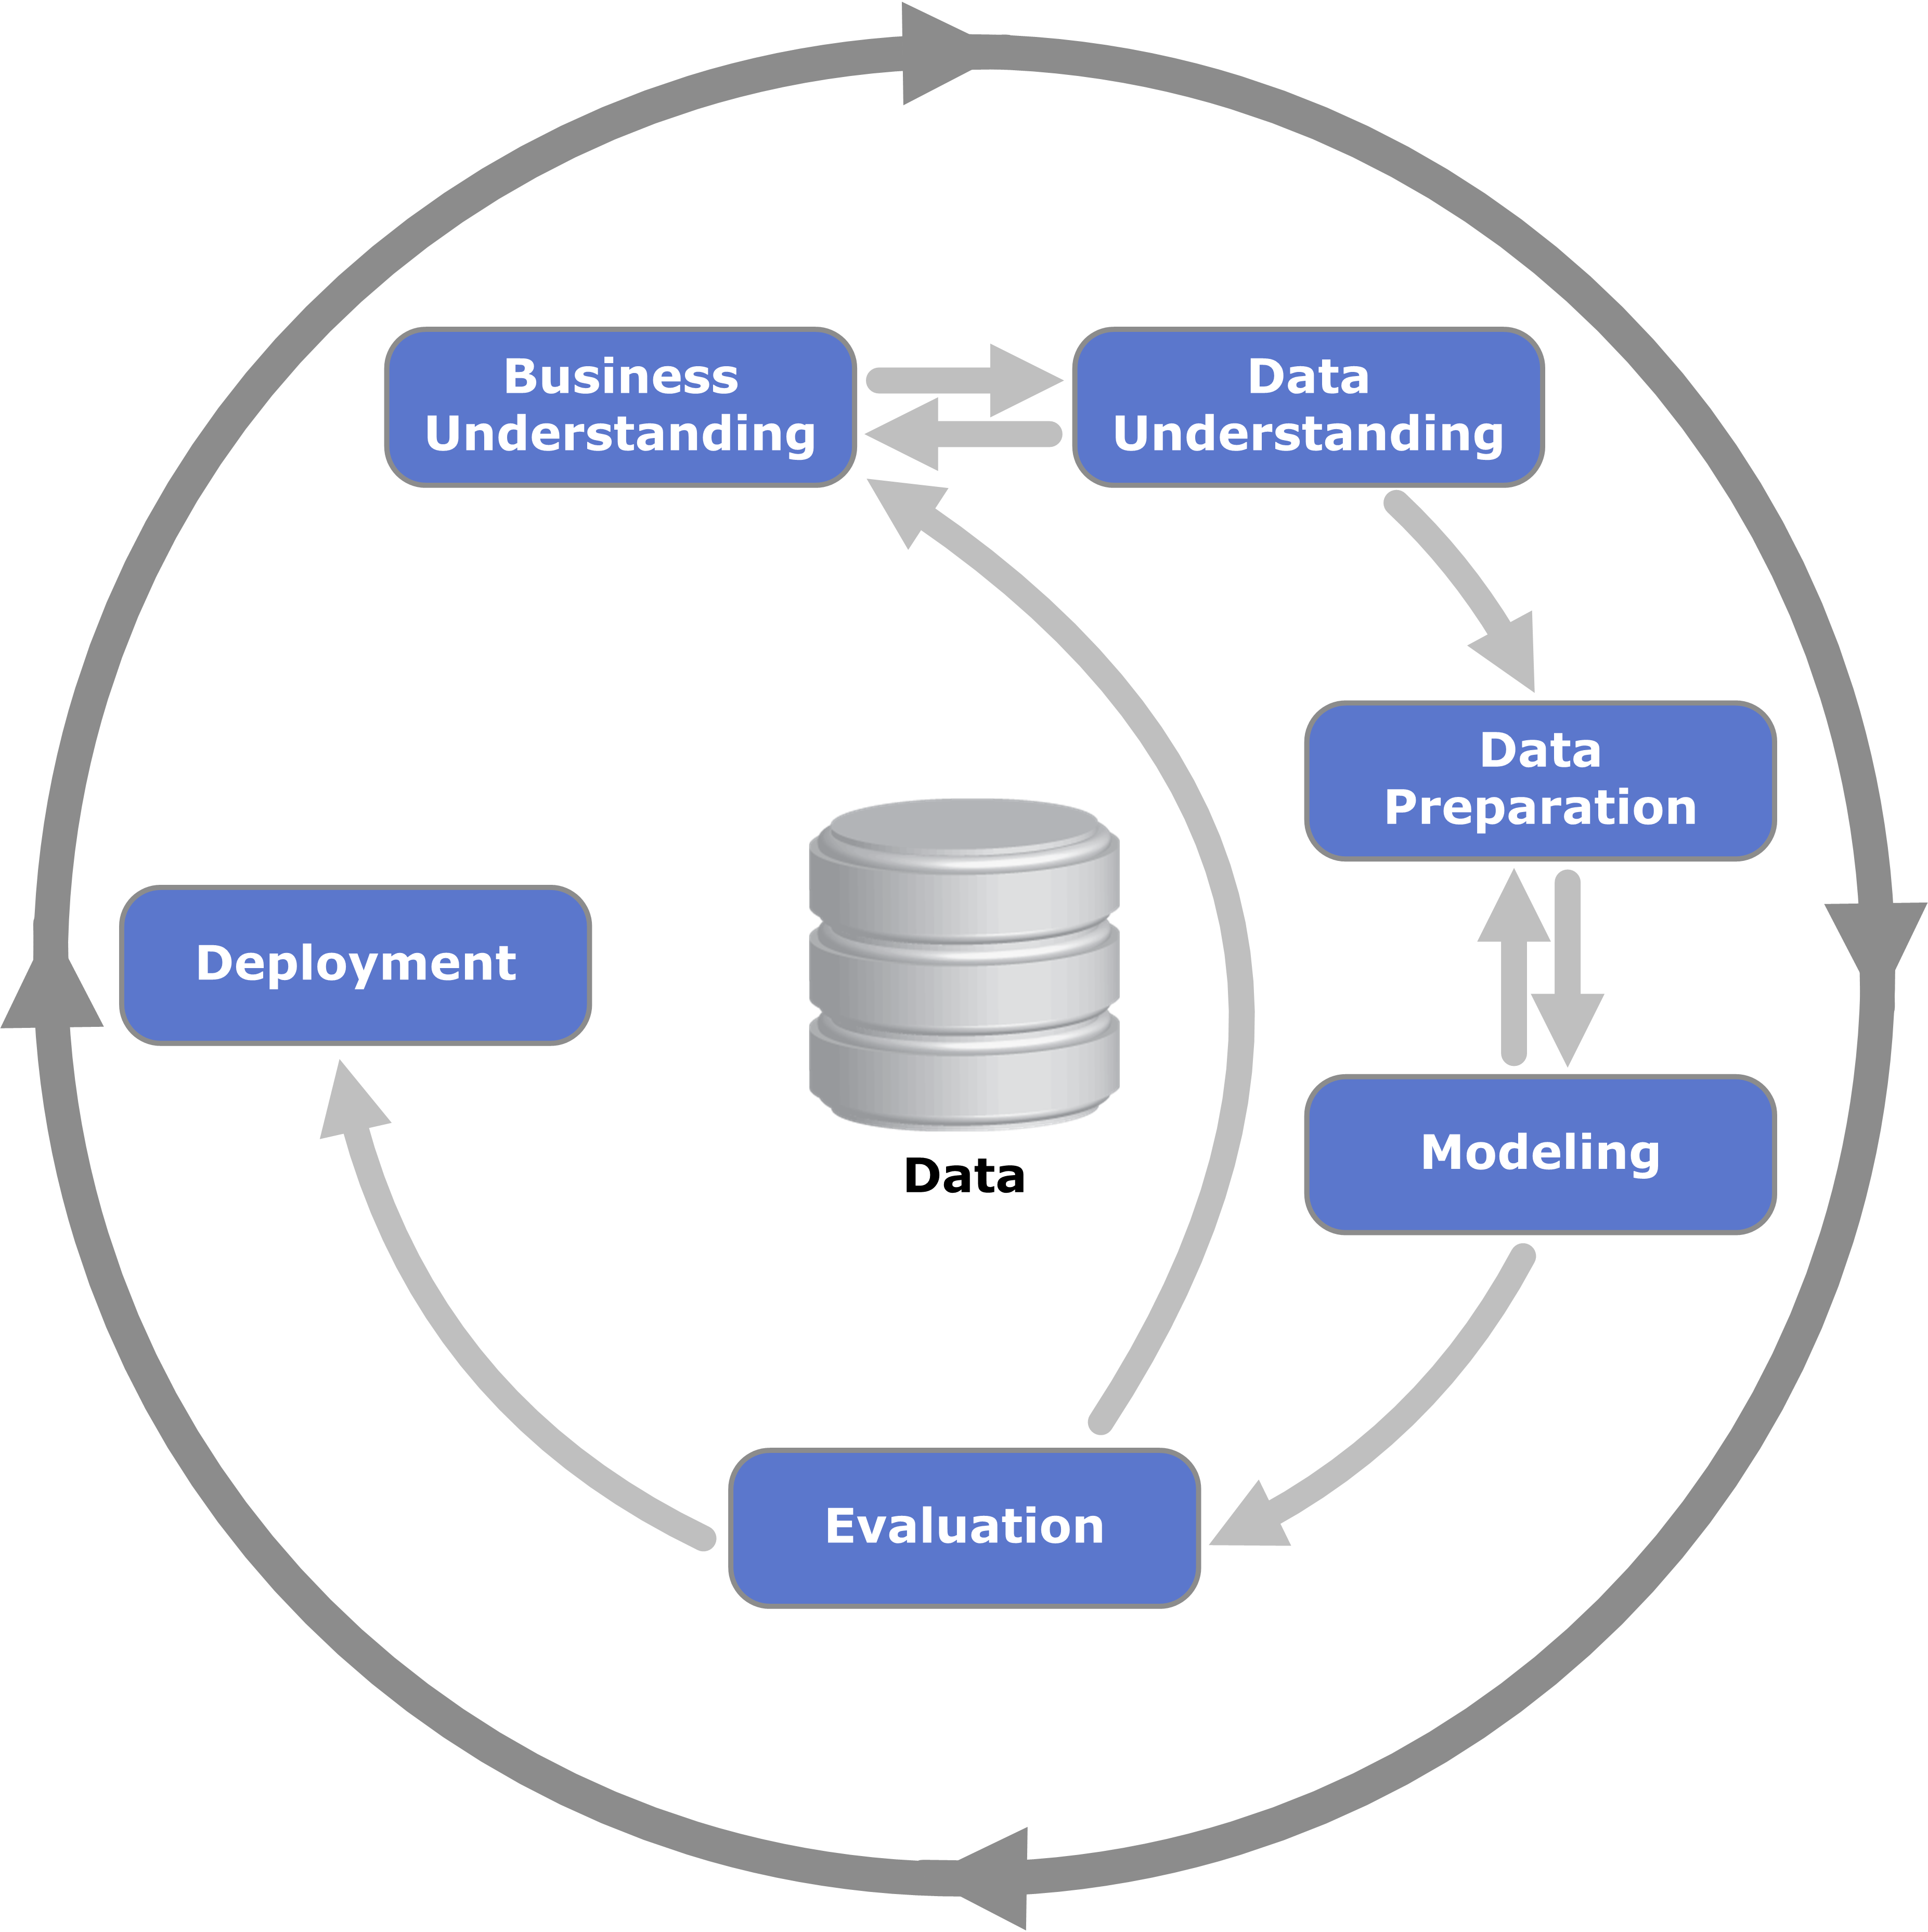

# Etap I - Zrozumienie uwarunkowań biznesowych

Etap pierwszy obejmuje zrozumienie uwarunkowań biznesowych, tym samym w niniejszym etapie warto pochylić się nad poszczególnymi komponentami konkursu takimi jak:
- **Zadanie konkursowe**: Przeprowadzenie predykcji wysokości rocznego wynagrodzenia zasadniczego członków zarządów wybranych spółek notowanych na Giełdzie Papierów Wartościowych w 2021 roku.
- **Dane**: Przesłane dane dotyczące wysokości rocznego wynagrodzenia zasadniczego członków zarządów (zbiór uczący - 461 rekordów, zbiór testowy - 120 rekordów).
- **Przewidywana zmienna**: Wynagrodzenie podstawowe za rok 2021.
- **Predyktory (zmienne niezależne)**: Funkcja, Obcokrajowiec, Płeć, Makrosektor, WIG, Skarb Państwa, Spółka rodzinna, Zatrudnienie, Komitet ds. wynagrodzeń w radzie nadzorczej, ROE, ROA, Zysk netto, Wartość rynkowa, EPS.
- **Cel analizy**: Przeprowadzenie predykcji wielkości wynagrodzeń menadżerów w zbiorze testowym na podstawie danych ze zbioru uczącego.

Opis poszczególnych cech:
- **Wynagrodzenie podstawowe** – kwota całkowitego wynagrodzenia zasadniczego (podstawowego) danego członka zarządu spółki, za rok 2021.
- **Funkcja (członek zarządu/wiceprezes zarządu/prezes zarządu)** – oznaczenie funkcji, jaką dana osoba pełniła na dzień 31.12.2021 r.;
- **Obcokrajowiec (TAK/NIE)** – oznaczenie, czy dana osoba pochodzi z zagranicy;
- **Płeć (M/K)** – oznaczenie płci danego członka zarządu;
- **Makrosektor** – oznaczenie, do jakiego makrosektora należy spółka, w której zarządzie zasiada dana osoba; analiza została zawężona tylko do czterech sektorów: Produkcja przemysłowa i budowlano-montażowa, Finanse, Handel i Usługi, oraz Dobra konsumpcyjne;
- **WIG** – oznaczenie, czy spółka należy do jednego z trzech indeksów: WIG20, mWIG40, sWIG80; pozycja „Inny” oznacza przynależność tylko do głównego indeksu GPW w Warszawie, bez wchodzenia w skład któregokolwiek z trzech wymienionych wcześniej;
- **Skarb Państwa (TAK/NIE)** – oznaczenie, czy jest to Spółka Skarbu Państwa, bądź czy Skarb Państwa posiada decydujący głos na Walnym Zgromadzeniu Akcjonariuszy w spółce;
- **Spółka rodzinna (TAK/NIE)** – oznaczenie, czy spółka jest spółką rodzinną;
- **Zatrudnienie** – poziom zatrudnienia w spółce (w przeliczeniu na etaty), w której zarządzie zasiada dana osoba;
- **Komitet ds. wynagrodzeń w radzie nadzorczej (TAK/NIE)** – oznaczenie, czy w zarządzie spółki, w której zasiada dana osoba, funkcjonuje komitet ds. wynagrodzeń, ustalający m.in. politykę wynagrodzeń w spółce;
- **ROE (Return on Equity)** – wskaźnik stopy zwrotu (rentowności) z kapitału własnego, obliczany jako stosunek zysku netto do wielkości kapitału własnego, w spółce, w której zasiada dana osoba;
- **ROA (Return on Assets)** – wskaźnik rentowności aktywów, obliczany jako stosunek zysku netto spółki do wartości jej aktywów, w spółce, w której zasiada dana osoba;
- **Zysk netto (w tys. PLN)** – wskaźnik wartości wyniku finansowego, obliczany jako różnica między dochodami a kosztami, które spółka ponosi w ciągu określonego okresu;
- **Wartość rynkowa (w mln PLN)** – rozumiana jako kapitalizacja spółki, czyli bieżąca cena akcji (na dzień 31.12.2021) pomnożona przez liczbę akcji pozostającą w obrocie;
- **EPS (Earnings Per Share)** – wskaźnik oznaczający zysk netto na jedną akcję spółki notowanej na giełdzie.

W ramach konkursu otrzymaliśmy dodatkowe informacje, że nie jest konieczne wykorzystanie wszystkich zmiennych w analizie. Ponadto, dopuszcza się możliwość dodatkowego oczyszczania danych. Dodatkowo, autor wystosował e-mail do organizatorów konkursu z zapytaniem, czy możliwa jest inżynieria cech co zostało potwierdzone.

# Etap II - Zrozumienie danych

In [1]:
# zaimportowanie podstawowych bibliotek
import pandas as pd
import numpy as np
import pandas_profiling

# zaimportowanie bibliotek do wizualizacji danych
import matplotlib.pyplot as plt
import plotly.express as px

# zaimportowanie bibliotek do inżynierii cech
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

# zaimportowanie bibliotek do budowy modeli uczenia maszynowego
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import xgboost as xgb
from sklearn.model_selection import cross_val_score
from pycaret.regression import *

# umieszczenie danych z pliku excel w ramkach danych
training_data = pd.read_excel('Arkusz_z_danymi_BICC.xlsx', sheet_name='Zbiór uczący')
validation_data = pd.read_excel('Arkusz_z_danymi_BICC.xlsx', sheet_name='Zbiór testowy')

C:\Users\ddawiec001\AppData\Local\Temp\ipykernel_23408\3170966398.py:4: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling


In [2]:
# sprawdzenie jak wygląda ramka danych
training_data.head()

WYNAGRODZENIE PODSTAWOWE          Funkcja OBCOKRAJOWIEC PŁEĆ  \
0                  60000.00  członek zarządu           NIE    M   
1                3387978.98   prezes zarządu           NIE    M   
2                 292368.28   prezes zarządu           NIE    M   
3                 100533.00  członek zarządu           NIE    K   
4                 733188.00  członek zarządu           NIE    K   

          MAKROSEKTOR     WIG  Skarb Państwa Spółka rodzinna  \
0    Handel i Usługi      Inny           NIE             TAK   
1             Finanse     Inny           NIE             TAK   
2  Dobra Konsumpcyjne     Inny           NIE             TAK   
3    Handel i Usługi   mWIG 40           NIE             NIE   
4  Dobra Konsumpcyjne     Inny           NIE             NIE   

  ZATRUDNIENIE\n2021 (Etaty) KOMITET DS. WYNAGRODZEŃ W RADZIE NADZORCZEJ  \
0                       1335                                        NIE    
1                         44                                         NIE   
2                         81                                        NIE    
3                        235                                         TAK   
4                       1791                                         TAK   

      ROE     ROA  Zysk netto (tys.PLN)  wartość rynkowa (mln PLN)        EPS  
0  0.1257  0.0458                 25737                     202.09   3.400348  
1  0.0079  0.0042                  3489                      86.27   0.093832  
2  0.0488  0.0302                  3330                      30.65   1.233333  
3  0.4024  0.2715                141265                    2548.32  19.346645  
4  1.9754  0.1575                406580                    5197.30  39.583941

In [3]:
# Zdefiniowanie nowcych nazw dla kolumn
new_columns = {
    'WYNAGRODZENIE PODSTAWOWE': 'wynagrodzenie_podstawowe',
    'WYNAGRODZENIE PODSTAWOWE (PROGNOZY)': 'wynagrodzenie_podstawowe',
    'Funkcja': 'funkcja',
    'OBCOKRAJOWIEC': 'obcokrajowiec',
    'PŁEĆ': 'plec',
    'MAKROSEKTOR': 'makrosektor',
    'WIG ': 'WIG',
    'Skarb Państwa': 'skarb_panstwa',
    'Spółka rodzinna': 'spolka_rodzinna',
    'ZATRUDNIENIE\n2021 (Etaty)': 'zatrudnienie_etaty_2021',
    'KOMITET DS. WYNAGRODZEŃ W RADZIE NADZORCZEJ': 'komitet_ds_wynagrozen_w_radzie_nadzorczej',
    'ROE': 'ROE',
    'ROA': 'ROA',
    'Zysk netto (tys.PLN)': 'zysk_netto_tys_PLN',
    'wartość rynkowa (mln PLN)': 'wartosc_rynkowa_mln_PLN',
    'EPS': 'EPS'}

# Zmiana nazw kolumn w ramce danych "training_data"
training_data = training_data.rename(columns=new_columns)

# Zmiana nazw kolumn w ramce danych "validation_data"
validation_data = validation_data.rename(columns=new_columns)

In [4]:
training_data.head()

wynagrodzenie_podstawowe          funkcja obcokrajowiec plec  \
0                  60000.00  członek zarządu           NIE    M   
1                3387978.98   prezes zarządu           NIE    M   
2                 292368.28   prezes zarządu           NIE    M   
3                 100533.00  członek zarządu           NIE    K   
4                 733188.00  członek zarządu           NIE    K   

          makrosektor      WIG skarb_panstwa spolka_rodzinna  \
0    Handel i Usługi      Inny           NIE             TAK   
1             Finanse     Inny           NIE             TAK   
2  Dobra Konsumpcyjne     Inny           NIE             TAK   
3    Handel i Usługi   mWIG 40           NIE             NIE   
4  Dobra Konsumpcyjne     Inny           NIE             NIE   

  zatrudnienie_etaty_2021 komitet_ds_wynagrozen_w_radzie_nadzorczej     ROE  \
0                    1335                                      NIE   0.1257   
1                      44                                       NIE  0.0079   
2                      81                                      NIE   0.0488   
3                     235                                       TAK  0.4024   
4                    1791                                       TAK  1.9754   

      ROA  zysk_netto_tys_PLN  wartosc_rynkowa_mln_PLN        EPS  
0  0.0458               25737                   202.09   3.400348  
1  0.0042                3489                    86.27   0.093832  
2  0.0302                3330                    30.65   1.233333  
3  0.2715              141265                  2548.32  19.346645  
4  0.1575              406580                  5197.30  39.583941

In [5]:
# Usunięcie kolumny 'wynagrodzenie_podstawowe'
validation_data.drop('wynagrodzenie_podstawowe', axis=1, inplace=True)

# Utworzenie nowej kolumny 'wynagrodzenie_podstawowe' z pustymi wartościami
validation_data.insert(0, 'wynagrodzenie_podstawowe', '')

In [6]:
# Tworzenie raportu pandas profiling dla ramki danych training_data
profile = training_data.profile_report(title="Pandas Profiling Report")

# Wyświetlanie raportu w notebooku
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [7]:
# Tworzenie raportu pandas profiling dla ramki danych validation_data
profile = validation_data.profile_report(title="Pandas Profiling Report")

# Wyświetlanie raportu w notebooku
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Na podstawie przeprowadzonej analizy danych dostrzeżono następujące kwestie:
1. dane zawierają wiele wartości skrajnych, które koniecznie należy uwzględnić przy kolejnych krokach analizy,
2. W kolumnach "zatrudnienie_etaty_2021" oraz "komitet_ds_wynagrozen_w_radzie_nadzorczej" występuje część rekordów oznaczonych jako "BD" (Brak Danych),
3. kolumna "komitet_ds_wynagrozen_w_radzie_nadzorczej" zawiera kategoryczne wartości "NIE" oraz "NIE ", które wymagają uspójnienia,
4. niektóre wartości w kolumnie "zatrudnienie_etaty_2021" są bardzo niskie, co jest niezwykle nietypowe, biorąc pod uwagę analizę spółek notowanych na giełdzie,
5. na podstawie analizy autor doszedł do wniosku, że można usunąć pewne wartości skrajne w kolumnach "ROE", "ROA" oraz "wartosc_rynkowa_mln_PLN",
6. w ramach zbioru danych zidentyfikowano kilkadziesiąt zduplikowanych wartości w ramach wybranych kolumn, co hipotetycznie oznacza kilkadziesiąt przedsiębiorstw.

# Etap III - Przygotowanie danych

In [8]:
# Dodanie kolumny 'training_validation_column' do training_data
training_data.insert(0, 'training_validation_column', 1)

# Dodanie kolumny 'training_validation_column' do validation_data
validation_data.insert(0, 'training_validation_column', 0)

# Połączenie training_data i validation_data w jeden DataFrame
training_data = pd.concat([training_data, validation_data], ignore_index=True)

In [9]:
# Następnie uzupełnie wartości BD oraz stworzę dodatkową kolumnę informującą, że dany wiersz posiadał jedną lub dwie brakujące wartości

# Tworzenie kolumny 'jedna_wartosc_BD'
training_data['jedna_wartosc_BD'] = (training_data['zatrudnienie_etaty_2021'] == 'BD') | (training_data['komitet_ds_wynagrozen_w_radzie_nadzorczej'] == 'BD')
training_data['jedna_wartosc_BD'] = training_data['jedna_wartosc_BD'].astype(int)

# Tworzenie kolumny 'dwie_wartosci_BD'
training_data['dwie_wartosci_BD'] = (training_data['zatrudnienie_etaty_2021'] == 'BD') & (training_data['komitet_ds_wynagrozen_w_radzie_nadzorczej'] == 'BD')
training_data['dwie_wartosci_BD'] = training_data['dwie_wartosci_BD'].astype(int)

In [10]:
# Zamiana wartości "NIE " na "NIE" w kolumnie "komitet_ds_wynagrozen_w_radzie_nadzorczej"
training_data['komitet_ds_wynagrozen_w_radzie_nadzorczej'] = training_data['komitet_ds_wynagrozen_w_radzie_nadzorczej'].replace('NIE ', 'NIE')

# zamiana wartości BD na nan
training_data = training_data.replace('BD', np.nan)

# Uzupełnienie wartości NaN w kolumnie liczbowej średnią
mean_value = training_data['zatrudnienie_etaty_2021'].mean()
training_data['zatrudnienie_etaty_2021'].fillna(mean_value, inplace=True)

# Uzupełnienie wartości NaN w kolumnie kategorycznej najczęściej występującą wartością
most_frequent_value = training_data['komitet_ds_wynagrozen_w_radzie_nadzorczej'].mode()[0]
training_data['komitet_ds_wynagrozen_w_radzie_nadzorczej'].fillna(most_frequent_value, inplace=True)

In [11]:
pd.set_option('display.float_format', '{:.2f}'.format)

In [12]:
# Odtwarzanie kolumny kapital_wlasny na podstawie wzoru na ROE
training_data['kapital_wlasny'] = (training_data['zysk_netto_tys_PLN'] / (training_data['ROE'] / 100)).round()

In [13]:
# Odtwarzanie kolumny aktywa na podstawie wzoru na ROA
training_data['aktywa'] = (training_data['zysk_netto_tys_PLN'] / (training_data['ROA'] / 100)).round()

In [14]:
# Obliczanie ilości akcji na podstawie EPS i zysku netto
training_data['ilosc_akcji'] = (training_data['zysk_netto_tys_PLN'] / training_data['EPS']).round()

In [15]:
# kolumna informująca o zysku lub stracie netto
training_data['zysk_strata_netto'] = 0
training_data.loc[training_data['zysk_netto_tys_PLN'] > 0, 'zysk_strata_netto'] = 1

In [16]:
# kolumna pokazująca stosunek zysku netto do wartości rynkowej
training_data['zysk_netto_do_wartosci_rynkowej'] = training_data['zysk_netto_tys_PLN'] / training_data['wartosc_rynkowa_mln_PLN']

In [17]:
# wskaźnik opłacalności na podstawie stosunku ROE do ROA
training_data['wskaznik_oplacalnosci'] = training_data['ROE'] / training_data['ROA']

In [18]:
# wskaźnik zwrotu z inwestycji (ROI) na podstawie zysk_netto_tys_PLN oraz kapital_wlasny
training_data['ROI'] = (training_data['zysk_netto_tys_PLN'] / training_data['kapital_wlasny'])*100

In [19]:
# kolumna pokazująca zysk netto na pracownika
training_data['zysk_netto_na_pracownika'] = training_data['zysk_netto_tys_PLN'] / training_data['zatrudnienie_etaty_2021']
training_data.loc[training_data['zatrudnienie_etaty_2021'] == 0, 'zysk_netto_na_pracownika'] = 0

In [20]:
#kolumna infomrująca ile osób jest w zarządzie danego przedsiębiorstwa w tym ile osób jest w roli wiceprezesa oraz członka zarządu
training_data['liczba_osob_w_zarzadznie'] = training_data.groupby(['zatrudnienie_etaty_2021', 'zysk_netto_tys_PLN', 'wartosc_rynkowa_mln_PLN'])['zatrudnienie_etaty_2021'].transform('count').fillna(1)
training_data['liczba_wiceprezesow_w_zarzadzie'] = training_data.groupby(['zatrudnienie_etaty_2021', 'zysk_netto_tys_PLN', 'wartosc_rynkowa_mln_PLN'])['funkcja'].transform(lambda x: x[x == 'wiceprezes zarządu'].count())
training_data['liczba_czlonkow_zarzadu_w_zarzadzie'] = training_data.groupby(['zatrudnienie_etaty_2021', 'zysk_netto_tys_PLN', 'wartosc_rynkowa_mln_PLN'])['funkcja'].transform(lambda x: x[x == 'członek zarządu'].count())

training_data['liczba_osob_w_zarzadznie'] = training_data['liczba_osob_w_zarzadznie'].fillna(0)
training_data['liczba_wiceprezesow_w_zarzadzie'] = training_data['liczba_wiceprezesow_w_zarzadzie'].fillna(0)
training_data['liczba_czlonkow_zarzadu_w_zarzadzie'] = training_data['liczba_czlonkow_zarzadu_w_zarzadzie'].fillna(0)

In [21]:
# kolumna inforująca o stosunku liczby członków zarządu do liczby pracowników 
training_data['stosunek_zarzadu_do_pracowników'] = training_data['zatrudnienie_etaty_2021'] / training_data['liczba_osob_w_zarzadznie']

In [22]:
# kolumna inforująca o stosunku zysku netto do liczby członków zarządu 
training_data['stosunek_zysku_netto_do_zarzadu'] = training_data['zysk_netto_tys_PLN'] / training_data['liczba_osob_w_zarzadznie']

In [23]:
# kolumna inforująca o stosunku aktywów do liczby członków zarządu 
training_data['stosunek_aktywow_do_zarzadu'] = training_data['aktywa'] / training_data['liczba_osob_w_zarzadznie']

In [24]:
# kolumna inforująca o stosunku kapitału własnego do liczby członków zarządu 
training_data['stosunek_kapitalu_wlasnego_do_zarzadu'] = training_data['kapital_wlasny'] / training_data['liczba_osob_w_zarzadznie']

In [25]:
# Wybieranie kolumn do transformacji
columns_to_transform = ['zatrudnienie_etaty_2021', 'ROE', 'ROA', 'zysk_netto_tys_PLN', 'wartosc_rynkowa_mln_PLN', 'EPS', 'kapital_wlasny', 'aktywa', 'ilosc_akcji', 'zysk_netto_do_wartosci_rynkowej', 'wskaznik_oplacalnosci', 'ROI', 'zysk_netto_na_pracownika', 'liczba_osob_w_zarzadznie', 'liczba_wiceprezesow_w_zarzadzie', 'liczba_czlonkow_zarzadu_w_zarzadzie', 'stosunek_zarzadu_do_pracowników', 'stosunek_zysku_netto_do_zarzadu', 'stosunek_aktywow_do_zarzadu', 'stosunek_kapitalu_wlasnego_do_zarzadu']

# Tworzenie obiektu PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)

# Wykonanie transformacji dla wybranych kolumn
transformed_features = poly_features.fit_transform(training_data[columns_to_transform])

# Tworzenie nazw dla nowych cech
new_feature_names = poly_features.get_feature_names_out(columns_to_transform)

# Tworzenie DataFrame dla nowych cech
transformed_df = pd.DataFrame(transformed_features, columns=new_feature_names)

training_data = training_data.drop(columns=columns_to_transform).reset_index(drop=True)

# Dodawanie nowych cech do oryginalnego DataFrame
training_data = pd.concat([training_data, transformed_df], axis=1)

# Wyświetlenie wyniku
training_data.head()

training_validation_column wynagrodzenie_podstawowe          funkcja  \
0                           1                 60000.00  członek zarządu   
1                           1               3387978.98   prezes zarządu   
2                           1                292368.28   prezes zarządu   
3                           1                100533.00  członek zarządu   
4                           1                733188.00  członek zarządu   

  obcokrajowiec plec         makrosektor      WIG skarb_panstwa  \
0           NIE    M    Handel i Usługi      Inny           NIE   
1           NIE    M             Finanse     Inny           NIE   
2           NIE    M  Dobra Konsumpcyjne     Inny           NIE   
3           NIE    K    Handel i Usługi   mWIG 40           NIE   
4           NIE    K  Dobra Konsumpcyjne     Inny           NIE   

  spolka_rodzinna komitet_ds_wynagrozen_w_radzie_nadzorczej  ...  \
0             TAK                                       NIE  ...   
1             TAK                                       NIE  ...   
2             TAK                                       NIE  ...   
3             NIE                                       TAK  ...   
4             NIE                                       TAK  ...   

   stosunek_zarzadu_do_pracowników^2  \
0                           71289.00   
1                             484.00   
2                            1640.25   
3                           13806.25   
4                          128307.24   

   stosunek_zarzadu_do_pracowników stosunek_zysku_netto_do_zarzadu  \
0                                         1374355.80                 
1                                           38379.00                 
2                                           67432.50                 
3                                         8299318.75                 
4                                        29127391.20                 

   stosunek_zarzadu_do_pracowników stosunek_aktywow_do_zarzadu  \
0                                      3000776848.20             
1                                       913785719.00             
2                                       223286422.50             
3                                      3056839345.00             
4                                     18493581732.48             

   stosunek_zarzadu_do_pracowników stosunek_kapitalu_wlasnego_do_zarzadu  \
0                                      1093361796.00                       
1                                       485810127.00                       
2                                       138181342.50                       
3                                      2062454940.00                       
4                                      1474506014.04                       

   stosunek_zysku_netto_do_zarzadu^2  \
0                        26495726.76   
1                         3043280.25   
2                         2772225.00   
3                      4988950056.25   
4                      6612291856.00   

   stosunek_zysku_netto_do_zarzadu stosunek_aktywow_do_zarzadu  \
0                                     57850931642.04             
1                                     72459053945.25             
2                                      9179552925.00             
3                                   1837550681155.00             
4                                   4198280547622.40             

   stosunek_zysku_netto_do_zarzadu stosunek_kapitalu_wlasnego_do_zarzadu  \
0                                     21078541231.20                       
1                                     38522534843.25                       
2                                      5680788525.00                       
3                                   1239798711060.00                       
4                                    334731800775.20                       

   stosunek_aktywow_do_zarzadu^2  \
0             126312077497133.16   
1            1725215579025510.25   
2              303958

# Etap III - Modelowanie

In [26]:
# Jak było widać w etapie drugim dane posiadają różne skale i rozkłady, ponadto posiadamy wartości skrajne tym samym najlepszym podejściem do przeskalowania cech jest standaryzacja

# Wybierz kolumny liczbowe do standaryzacji (z wyjątkiem 'wynagrodzenie_podstawowe')
numeric_columns = ['zatrudnienie_etaty_2021', 'ROE','ROA','zysk_netto_tys_PLN','wartosc_rynkowa_mln_PLN','EPS', 'kapital_wlasny', 'aktywa', 'ilosc_akcji', 'zysk_netto_do_wartosci_rynkowej',
                   'wskaznik_oplacalnosci', 'ROI', 'zysk_netto_na_pracownika', 'stosunek_zarzadu_do_pracowników', 'stosunek_zysku_netto_do_zarzadu', 'liczba_osob_w_zarzadznie', 'liczba_wiceprezesow_w_zarzadzie', 
                   'stosunek_aktywow_do_zarzadu', 'stosunek_kapitalu_wlasnego_do_zarzadu']

# Standaryzacja danych
scaler = StandardScaler()
training_data[numeric_columns] = scaler.fit_transform(training_data[numeric_columns])

In [27]:
# wykonam kodowanie kodowanie one-hot encoding dla wybranych kolumn
encoded_data = pd.get_dummies(training_data, columns=['funkcja', 'plec', 'makrosektor', 'WIG'])

training_data = encoded_data

In [28]:
# Usuwanie części kolumn w celu usunięcia zależności liniowej 
training_data.drop(['plec_M', 'makrosektor_Dobra Konsumpcyjne', 'WIG_Inny', 'funkcja_prezes zarządu'], axis=1)

training_validation_column wynagrodzenie_podstawowe obcokrajowiec  \
0                             1                 60000.00           NIE   
1                             1               3387978.98           NIE   
2                             1                292368.28           NIE   
3                             1                100533.00           NIE   
4                             1                733188.00           NIE   
..                          ...                      ...           ...   
576                           0                                    NIE   
577                           0                                    NIE   
578                           0                                    NIE   
579                           0                                    NIE   
580                           0                                    NIE   

    skarb_panstwa spolka_rodzinna komitet_ds_wynagrozen_w_radzie_nadzorczej  \
0             NIE             TAK                                       NIE   
1             NIE             TAK                                       NIE   
2             NIE             TAK                                       NIE   
3             NIE             NIE                                       TAK   
4             NIE             NIE                                       TAK   
..            ...             ...                                       ...   
576           NIE             NIE                                       NIE   
577           NIE             NIE                                       TAK   
578           NIE             NIE                                       TAK   
579           NIE             NIE                                       TAK   
580           NIE             NIE                                       NIE   

     jedna_wartosc_BD  dwie_wartosci_BD  zysk_strata_netto  \
0                   0                 0                  1   
1                   0                 0                  1   
2                   0                 0                  1   
3                   0                 0                  1   
4                   0                 0                  1   
..                ...               ...                ...   
576                 1                 0                  1   
577                 0                 0                  1   
578                 0                 0                  1   
579                 0                 0                  0   
580                 1                 0                  0   

     zatrudnienie_etaty_2021  ...  stosunek_kapitalu_wlasnego_do_zarzadu^2  \
0                      -0.22  ...                        16768926720144.00   
1                      -0.44  ...                       487627023751562.25   
2                      -0.43  ...                        11640959253225.00   
3                      -0.41  ...                       308101068684864.00   
4                      -0.14  ...                        16945014057196.84   
..                       ...  ...                                      ...   
576                    -0.42  ...                        13483253522025.00   
577                    -0.41  ...                        57654005871552.25   
578                    -0.33  ...                       950823064905561.00   
579                     0.60  ...                     52311961491194888.00   
580                     2.18  ...                      1797266497872400.00   

     funkcja_członek zarządu  funkcja_wiceprezes zarządu  plec_K  \
0                          1                           0       0   
1                          0                           0       0   
2                          0                           0       0   
3                          1                           0       1   
4                          1                           0       1   
..                       ...                         ...     ...   
576      

In [29]:
training_data

training_validation_column wynagrodzenie_podstawowe obcokrajowiec  \
0                             1                 60000.00           NIE   
1                             1               3387978.98           NIE   
2                             1                292368.28           NIE   
3                             1                100533.00           NIE   
4                             1                733188.00           NIE   
..                          ...                      ...           ...   
576                           0                                    NIE   
577                           0                                    NIE   
578                           0                                    NIE   
579                           0                                    NIE   
580                           0                                    NIE   

    skarb_panstwa spolka_rodzinna komitet_ds_wynagrozen_w_radzie_nadzorczej  \
0             NIE             TAK                                       NIE   
1             NIE             TAK                                       NIE   
2             NIE             TAK                                       NIE   
3             NIE             NIE                                       TAK   
4             NIE             NIE                                       TAK   
..            ...             ...                                       ...   
576           NIE             NIE                                       NIE   
577           NIE             NIE                                       TAK   
578           NIE             NIE                                       TAK   
579           NIE             NIE                                       TAK   
580           NIE             NIE                                       NIE   

     jedna_wartosc_BD  dwie_wartosci_BD  zysk_strata_netto  \
0                   0                 0                  1   
1                   0                 0                  1   
2                   0                 0                  1   
3                   0                 0                  1   
4                   0                 0                  1   
..                ...               ...                ...   
576                 1                 0                  1   
577                 0                 0                  1   
578                 0                 0                  1   
579                 0                 0                  0   
580                 1                 0                  0   

     zatrudnienie_etaty_2021  ...  plec_K  plec_M  \
0                      -0.22  ...       0       1   
1                      -0.44  ...       0       1   
2                      -0.43  ...       0       1   
3                      -0.41  ...       1       0   
4                      -0.14  ...       1       0   
..                       ...  ...     ...     ...   
576                    -0.42  ...       0       1   
577                    -0.41  ...       0       1   
578                    -0.33  ...       1       0   
579                     0.60  ...       0       1   
580                     2.18  ...       0       1   

     makrosektor_Dobra Konsumpcyjne  makrosektor_Finanse  \
0                                 0                    0   
1                                 0                    1   
2                                 1                    0   
3                                 0                    0   
4                                 1                    0   
..                              ...                  ...   
576                               0                    0   
577                               0                    0   
578                               0                    1   
579                               0                    1   
580                               1                    0   

     makrosektor_Handel i Usługi   \
0                          

In [30]:
# Tworzenie mapy zamiany wartości
mapping = {'TAK': 1, 'NIE': 0}

# Zastosowanie mapowania dla odpowiednich kolumn
training_data['obcokrajowiec'] = training_data['obcokrajowiec'].map(mapping)
training_data['skarb_panstwa'] = training_data['skarb_panstwa'].map(mapping)
training_data['spolka_rodzinna'] = training_data['spolka_rodzinna'].map(mapping)
training_data['komitet_ds_wynagrozen_w_radzie_nadzorczej'] = training_data['komitet_ds_wynagrozen_w_radzie_nadzorczej'].map(mapping)

In [31]:
# Podział DataFrame merged_data na training_data i validation_data na podstawie kolumny 'training_validation_column'
validation_data = training_data.loc[training_data['training_validation_column'] == 0].copy()
training_data = training_data.loc[training_data['training_validation_column'] == 1].copy()

# Usunięcie kolumny 'training_validation_column' z training_data i validation_data
training_data.drop('training_validation_column', axis=1, inplace=True)
validation_data.drop('training_validation_column', axis=1, inplace=True)

In [32]:
training_data.head()

wynagrodzenie_podstawowe  obcokrajowiec  skarb_panstwa  spolka_rodzinna  \
0                 60000.00              0              0                1   
1               3387978.98              0              0                1   
2                292368.28              0              0                1   
3                100533.00              0              0                0   
4                733188.00              0              0                0   

   komitet_ds_wynagrozen_w_radzie_nadzorczej  jedna_wartosc_BD  \
0                                          0                 0   
1                                          0                 0   
2                                          0                 0   
3                                          1                 0   
4                                          1                 0   

   dwie_wartosci_BD  zysk_strata_netto  zatrudnienie_etaty_2021   ROE  ...  \
0                 0                  1                    -0.22 -0.05  ...   
1                 0                  1                    -0.44 -0.13  ...   
2                 0                  1                    -0.43 -0.10  ...   
3                 0                  1                    -0.41  0.15  ...   
4                 0                  1                    -0.14  1.26  ...   

   plec_K  plec_M  makrosektor_Dobra Konsumpcyjne  makrosektor_Finanse  \
0       0       1                               0                    0   
1       0       1                               0                    1   
2       0       1                               1                    0   
3       1       0                               0                    0   
4       1       0                               1                    0   

   makrosektor_Handel i Usługi   \
0                             1   
1                             0   
2                             0   
3                             1   
4                             0   

   makrosektor_Produkcja Przemysłowa i Budowlano-Montażowa  WIG_Inny  \
0                                                  0               1   
1                                                  0               1   
2                                                  0               1   
3                                                  0               0   
4                                                  0               1   

   WIG_WIG 20  WIG_mWIG 40  WIG_sWIG 80  
0           0            0            0  
1           0            0            0  
2           0            0            0  
3           0            1            0  
4           0            0            0  

[5 rows x 251 columns]

In [33]:
validation_data.head()

wynagrodzenie_podstawowe  obcokrajowiec  skarb_panstwa  spolka_rodzinna  \
461                                       0              0                0   
462                                       0              0                1   
463                                       0              0                0   
464                                       0              0                0   
465                                       0              0                1   

     komitet_ds_wynagrozen_w_radzie_nadzorczej  jedna_wartosc_BD  \
461                                          1                 0   
462                                          0                 0   
463                                          1                 0   
464                                          1                 0   
465                                          0                 0   

     dwie_wartosci_BD  zysk_strata_netto  zatrudnienie_etaty_2021   ROE  ...  \
461                 0                  1                    -0.45  0.01  ...   
462                 0                  1                    -0.34 -0.10  ...   
463                 0                  1                    -0.25 -0.12  ...   
464                 0                  0                     0.11 -1.36  ...   
465                 0                  1                    -0.34 -0.10  ...   

     plec_K  plec_M  makrosektor_Dobra Konsumpcyjne  makrosektor_Finanse  \
461       1       0                               0                    1   
462       1       0                               1                    0   
463       1       0                               0                    1   
464       0       1                               0                    1   
465       0       1                               1                    0   

     makrosektor_Handel i Usługi   \
461                             0   
462                             0   
463                             0   
464                             0   
465                             0   

     makrosektor_Produkcja Przemysłowa i Budowlano-Montażowa  WIG_Inny  \
461                                                  0               1   
462                                                  0               1   
463                                                  0               0   
464                                                  0               0   
465                                                  0               1   

     WIG_WIG 20  WIG_mWIG 40  WIG_sWIG 80  
461           0            0            0  
462           0            0            0  
463           0            0            1  
464           0            0            1  
465           0            0            0  

[5 rows x 251 columns]

In [34]:
#Inicjalizacja środowiska AutoML
exp_reg = setup(data=training_data, target='wynagrodzenie_podstawowe')

# Porównanie i wybór modeli
best_model = compare_models(round=2)  # Ustawienie zaokrąglenia wyników 

Processing:   0%|          | 0/81 [00:00<?, ?it/s]

# Etap IV - Ewaluacja

In [35]:
#Gradient Boosting Regressor
# Wczytanie danych treningowych
df = training_data

# Podział na cechy (X) i etykiety (y)
X = df.drop('wynagrodzenie_podstawowe', axis=1)
y = df['wynagrodzenie_podstawowe']

# Utworzenie modelu GradientBoostingRegressor
gb_reg = GradientBoostingRegressor()

# Wybór zmiennych na podstawie współczynnika ważności cech
sfm = SelectFromModel(gb_reg)
X_selected = sfm.fit_transform(X, y)

# Pobranie indeksów wybranych zmiennych
selected_feature_indexes = sfm.get_support(indices=True)

# Pobranie nazw wybranych zmiennych
selected_features = X.columns[selected_feature_indexes]

# Wyświetlanie wybranych zmiennych
print("\n-----------------------------------------------------------------------------------")
print("\nSelected features:")
print(selected_features)

# Definicja siatki parametrów do przeszukania
param_grid = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001]
}

# Utworzenie obiektu GridSearchCV z uwzględnieniem wybranych zmiennych
grid_search = GridSearchCV(estimator=gb_reg, param_grid=param_grid, cv=5)
grid_search.fit(X_selected, y)

# Wybór optymalnych parametrów
best_params = grid_search.best_params_

# Wyświetlanie najlepszych parametrów
print("\n-----------------------------------------------------------------------------------")
print("\nBest parameters:", best_params)

# Utworzenie modelu GradientBoostingRegressor z optymalnymi parametrami
gb_best = GradientBoostingRegressor(**best_params)

# Wykonanie kroswalidacji
cv_scores = cross_val_score(gb_best, X_selected, y, cv=5, scoring='neg_mean_absolute_error')

# Obliczenie średniej wartości miary MAE
avg_mae = -np.mean(cv_scores)

# Wyświetlanie wyników kroswalidacji
print("\n-----------------------------------------------------------------------------------")
print("\nCross-Validation Results:")
print("Average MAE:", avg_mae)

# Trenowanie modelu na wybranych zmiennych
gb_best.fit(X_selected, y)

# Przewidywanie na danych treningowych
y_pred = gb_best.predict(X_selected)

# Obliczanie metryk
mae = mean_absolute_error(y, y_pred)
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y, y_pred)
mape = np.mean(np.abs((y - y_pred) / y)) * 100

# Wyświetlanie wyników
print("\n-----------------------------------------------------------------------------------")
print("\nMetrics:")
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2:", r2)
print("MAPE:", mape)


-----------------------------------------------------------------------------------

Selected features:
Index(['aktywa', 'zysk_netto_na_pracownika',
       'zatrudnienie_etaty_2021 kapital_wlasny',
       'zatrudnienie_etaty_2021 aktywa', 'ROE ROA', 'ROE ROI',
       'ROE liczba_osob_w_zarzadznie', 'ROE stosunek_zarzadu_do_pracowników',
       'ROA^2', 'ROA zysk_netto_do_wartosci_rynkowej',
       'ROA stosunek_kapitalu_wlasnego_do_zarzadu', 'zysk_netto_tys_PLN^2',
       'zysk_netto_tys_PLN ilosc_akcji', 'zysk_netto_tys_PLN ROI',
       'zysk_netto_tys_PLN zysk_netto_na_pracownika',
       'EPS zysk_netto_do_wartosci_rynkowej',
       'EPS liczba_czlonkow_zarzadu_w_zarzadzie',
       'EPS stosunek_zarzadu_do_pracowników',
       'kapital_wlasny wskaznik_oplacalnosci',
       'kapital_wlasny liczba_osob_w_zarzadznie',
       'kapital_wlasny stosunek_zarzadu_do_pracowników',
       'kapital_wlasny stosunek_kapitalu_wlasnego_do_zarzadu', 'aktywa^2',
       'aktywa ilosc_akcji', 'aktywa 

In [36]:
#Extreme Gradient Boosting
# Wczytanie danych treningowych
df = training_data

# Podział na cechy (X) i etykiety (y)
X = df.drop('wynagrodzenie_podstawowe', axis=1)
y = df['wynagrodzenie_podstawowe']

# Utworzenie modelu XGBRegressor
xgb_reg = xgb.XGBRegressor()

# Wybór zmiennych na podstawie współczynnika ważności cech
sfm = SelectFromModel(xgb_reg)
X_selected = sfm.fit_transform(X, y)

# Pobranie indeksów wybranych zmiennych
selected_feature_indexes = sfm.get_support(indices=True)

# Pobranie nazw wybranych zmiennych
selected_features = X.columns[selected_feature_indexes]

# Wyświetlanie wybranych zmiennych
print("\n-----------------------------------------------------------------------------------")
print("\nSelected features:")
print(selected_features)

# Definicja siatki parametrów do przeszukania
param_grid = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001]
}

# Utworzenie obiektu GridSearchCV z uwzględnieniem wybranych zmiennych
grid_search = GridSearchCV(estimator=xgb_reg, param_grid=param_grid, cv=5)
grid_search.fit(X_selected, y)

# Wybór optymalnych parametrów
best_params = grid_search.best_params_

# Wyświetlanie najlepszych parametrów
print("\n-----------------------------------------------------------------------------------")
print("\nBest parameters:", best_params)

# Utworzenie modelu XGBRegressor z optymalnymi parametrami
xgb_best = xgb.XGBRegressor(**best_params)

# Wykonanie kroswalidacji
cv_scores = cross_val_score(xgb_best, X_selected, y, cv=5, scoring='neg_mean_absolute_error')

# Obliczenie średniej wartości miary MAE
avg_mae = -np.mean(cv_scores)

# Wyświetlanie wyników kroswalidacji
print("\n-----------------------------------------------------------------------------------")
print("\nCross-Validation Results:")
print("Average MAE:", avg_mae)

# Trenowanie modelu na wybranych zmiennych
xgb_best.fit(X_selected, y)

# Przewidywanie na danych treningowych
y_pred = xgb_best.predict(X_selected)

# Obliczanie metryk
mae = mean_absolute_error(y, y_pred)
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y, y_pred)
mape = np.mean(np.abs((y - y_pred) / y)) * 100

# Wyświetlanie wyników
print("\n-----------------------------------------------------------------------------------")
print("\nMetrics:")
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2:", r2)
print("MAPE:", mape)


-----------------------------------------------------------------------------------

Selected features:
Index(['zysk_netto_tys_PLN', 'aktywa', 'stosunek_zysku_netto_do_zarzadu',
       'zatrudnienie_etaty_2021 kapital_wlasny',
       'zatrudnienie_etaty_2021 aktywa',
       'zatrudnienie_etaty_2021 stosunek_kapitalu_wlasnego_do_zarzadu',
       'ROE^2', 'ROE ROA', 'ROE stosunek_aktywow_do_zarzadu',
       'ROA kapital_wlasny', 'ROA stosunek_kapitalu_wlasnego_do_zarzadu',
       'zysk_netto_tys_PLN^2', 'zysk_netto_tys_PLN ilosc_akcji',
       'zysk_netto_tys_PLN liczba_czlonkow_zarzadu_w_zarzadzie',
       'wartosc_rynkowa_mln_PLN stosunek_zysku_netto_do_zarzadu',
       'EPS liczba_osob_w_zarzadznie', 'EPS stosunek_zarzadu_do_pracowników',
       'EPS stosunek_kapitalu_wlasnego_do_zarzadu', 'kapital_wlasny^2',
       'kapital_wlasny ilosc_akcji', 'kapital_wlasny liczba_osob_w_zarzadznie',
       'ilosc_akcji stosunek_zysku_netto_do_zarzadu',
       'zysk_netto_do_wartosci_rynkowej lic

In [37]:
#Random Forest Regressor
# Wczytanie danych treningowych
df = training_data

# Podział na cechy (X) i etykiety (y)
X = df.drop('wynagrodzenie_podstawowe', axis=1)
y = df['wynagrodzenie_podstawowe']

# Utworzenie modelu RandomForestRegressor
rf = RandomForestRegressor()

# Wybór zmiennych na podstawie współczynnika ważności cech
sfm = SelectFromModel(rf)
X_selected = sfm.fit_transform(X, y)

# Pobranie indeksów wybranych zmiennych
selected_feature_indexes = sfm.get_support(indices=True)

# Pobranie nazw wybranych zmiennych
selected_features = X.columns[selected_feature_indexes]

# Wyświetlanie wybranych zmiennych
print("\n-----------------------------------------------------------------------------------")
print("\nSelected features:")
print(selected_features)

# Definicja siatki parametrów do przeszukania
param_grid = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10, 15]
}

# Utworzenie obiektu GridSearchCV z uwzględnieniem wybranych zmiennych
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)
grid_search.fit(X_selected, y)

# Wybór optymalnych parametrów
best_params = grid_search.best_params_

# Wyświetlanie najlepszych parametrów
print("\n-----------------------------------------------------------------------------------")
print("\nBest parameters:", best_params)

# Utworzenie modelu RandomForestRegressor z optymalnymi parametrami
rf_best = RandomForestRegressor(**best_params)

# Wykonanie kroswalidacji
cv_scores = cross_val_score(rf_best, X_selected, y, cv=5, scoring='neg_mean_absolute_error')

# Obliczenie średniej wartości miary MAE
avg_mae = -np.mean(cv_scores)

# Wyświetlanie wyników kroswalidacji
print("\n-----------------------------------------------------------------------------------")
print("\nCross-Validation Results:")
print("Average MAE:", avg_mae)

# Trenowanie modelu na wybranych zmiennych
rf_best.fit(X_selected, y)

# Przewidywanie na danych treningowych
y_pred = rf_best.predict(X_selected)

# Obliczanie metryk
mae = mean_absolute_error(y, y_pred)
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y, y_pred)
mape = np.mean(np.abs((y - y_pred) / y)) * 100

# Wyświetlanie wyników
print("\n-----------------------------------------------------------------------------------")
print("\nMetrics:")
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2:", r2)
print("MAPE:", mape)


-----------------------------------------------------------------------------------

Selected features:
Index(['obcokrajowiec', 'zysk_netto_tys_PLN', 'aktywa',
       'stosunek_zysku_netto_do_zarzadu',
       'zatrudnienie_etaty_2021 wartosc_rynkowa_mln_PLN',
       'zatrudnienie_etaty_2021 kapital_wlasny',
       'zatrudnienie_etaty_2021 aktywa',
       'zatrudnienie_etaty_2021 wskaznik_oplacalnosci',
       'zatrudnienie_etaty_2021 ROI',
       'zatrudnienie_etaty_2021 liczba_osob_w_zarzadznie',
       'ROE zysk_netto_tys_PLN', 'ROE ROI', 'zysk_netto_tys_PLN^2',
       'zysk_netto_tys_PLN EPS',
       'zysk_netto_tys_PLN zysk_netto_do_wartosci_rynkowej',
       'zysk_netto_tys_PLN stosunek_zysku_netto_do_zarzadu',
       'wartosc_rynkowa_mln_PLN aktywa',
       'wartosc_rynkowa_mln_PLN wskaznik_oplacalnosci',
       'wartosc_rynkowa_mln_PLN liczba_osob_w_zarzadznie',
       'wartosc_rynkowa_mln_PLN liczba_wiceprezesow_w_zarzadzie',
       'wartosc_rynkowa_mln_PLN stosunek_kapitalu_w

In [38]:
#Extra Trees Regressor
# Wczytanie danych treningowych
df = training_data

# Podział na cechy (X) i etykiety (y)
X = df.drop('wynagrodzenie_podstawowe', axis=1)
y = df['wynagrodzenie_podstawowe']

# Utworzenie modelu ExtraTreesRegressor
etr = ExtraTreesRegressor()

# Wybór zmiennych na podstawie współczynnika ważności cech
sfm = SelectFromModel(etr)
X_selected = sfm.fit_transform(X, y)

# Pobranie indeksów wybranych zmiennych
selected_feature_indexes = sfm.get_support(indices=True)

# Pobranie nazw wybranych zmiennych
selected_features = X.columns[selected_feature_indexes]

# Wyświetlanie wybranych zmiennych
print("\n-----------------------------------------------------------------------------------")
print("\nSelected features:")
print(selected_features)

# Definicja siatki parametrów do przeszukania
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10, 15, 20]
}

# Utworzenie obiektu GridSearchCV z uwzględnieniem wybranych zmiennych
grid_search = GridSearchCV(estimator=etr, param_grid=param_grid, cv=5)
grid_search.fit(X_selected, y)

# Wybór optymalnych parametrów
best_params = grid_search.best_params_

# Wyświetlanie najlepszych parametrów
print("\n-----------------------------------------------------------------------------------")
print("\nBest parameters:", best_params)

# Utworzenie modelu ExtraTreesRegressor z optymalnymi parametrami
etr_best = ExtraTreesRegressor(**best_params)

# Wykonanie kroswalidacji
cv_scores = cross_val_score(etr_best, X_selected, y, cv=5, scoring='neg_mean_absolute_error')

# Obliczenie średniej wartości miary MAE
avg_mae = -np.mean(cv_scores)

# Wyświetlanie wyników kroswalidacji
print("\n-----------------------------------------------------------------------------------")
print("\nCross-Validation Results:")
print("Average MAE:", avg_mae)

# Trenowanie modelu na wybranych zmiennych
etr_best.fit(X_selected, y)

# Przewidywanie na danych treningowych
y_pred = etr_best.predict(X_selected)

# Obliczanie metryk
mae = mean_absolute_error(y, y_pred)
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y, y_pred)
mape = np.mean(np.abs((y - y_pred) / y)) * 100

# Wyświetlanie wyników
print("\n-----------------------------------------------------------------------------------")
print("\nMetrics:", best_params)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2:", r2)
print("MAPE:", mape)


-----------------------------------------------------------------------------------

Selected features:
Index(['obcokrajowiec', 'wartosc_rynkowa_mln_PLN', 'kapital_wlasny', 'aktywa',
       'wskaznik_oplacalnosci', 'stosunek_aktywow_do_zarzadu',
       'zatrudnienie_etaty_2021 wskaznik_oplacalnosci',
       'zatrudnienie_etaty_2021 liczba_osob_w_zarzadznie',
       'zatrudnienie_etaty_2021 liczba_wiceprezesow_w_zarzadzie',
       'zatrudnienie_etaty_2021 stosunek_aktywow_do_zarzadu',
       'ROE kapital_wlasny', 'ROE aktywa', 'ROA zysk_netto_tys_PLN',
       'ROA kapital_wlasny', 'ROA aktywa', 'zysk_netto_tys_PLN^2',
       'zysk_netto_tys_PLN zysk_netto_do_wartosci_rynkowej',
       'zysk_netto_tys_PLN wskaznik_oplacalnosci',
       'zysk_netto_tys_PLN liczba_osob_w_zarzadznie',
       'wartosc_rynkowa_mln_PLN aktywa',
       'wartosc_rynkowa_mln_PLN zysk_netto_do_wartosci_rynkowej',
       'wartosc_rynkowa_mln_PLN wskaznik_oplacalnosci',
       'wartosc_rynkowa_mln_PLN liczba_osob_w

# Etap VI - Wdrożenie

In [39]:
# Przewidywanie na danych walidacyjnych
X_validation_selected = sfm.transform(validation_data.drop('wynagrodzenie_podstawowe', axis=1))
y_pred_validation = etr_best.predict(X_validation_selected)

# Zapisywanie przewidywanych wartości w kolumnie 'wynagrodzenie_podstawowe' dla danych walidacyjnych
validation_data['wynagrodzenie_podstawowe'] = y_pred_validation

# Wyświetlanie wyników dla danych walidacyjnych
print("Validation Data - Predicted 'wynagrodzenie_podstawowe':")
validation_data

Validation Data - Predicted 'wynagrodzenie_podstawowe':


wynagrodzenie_podstawowe  obcokrajowiec  skarb_panstwa  spolka_rodzinna  \
461                 131491.74              0              0                0   
462                 360657.94              0              0                1   
463                 536642.50              0              0                0   
464                1310000.00              0              0                0   
465                 551918.24              0              0                1   
..                        ...            ...            ...              ...   
576                 378509.29              0              0                0   
577                 369067.76              0              0                0   
578                 359227.06              0              0                0   
579                1656000.00              0              0                0   
580                 686947.95              0              0                0   

     komitet_ds_wynagrozen_w_radzie_nadzorczej  jedna_wartosc_BD  \
461                                          1                 0   
462                                          0                 0   
463                                          1                 0   
464                                          1                 0   
465                                          0                 0   
..                                         ...               ...   
576                                          0                 1   
577                                          1                 0   
578                                          1                 0   
579                                          1                 0   
580                                          0                 1   

     dwie_wartosci_BD  zysk_strata_netto  zatrudnienie_etaty_2021   ROE  ...  \
461                 0                  1                    -0.45  0.01  ...   
462                 0                  1                    -0.34 -0.10  ...   
463                 0                  1                    -0.25 -0.12  ...   
464                 0                  0                     0.11 -1.36  ...   
465                 0                  1                    -0.34 -0.10  ...   
..                ...                ...                      ...   ...  ...   
576                 0                  1                    -0.42  0.35  ...   
577                 0                  1                    -0.41 -0.13  ...   
578                 0                  1                    -0.33  0.05  ...   
579                 0                  0                     0.60 -0.20  ...   
580                 0                  0                     2.18 -0.30  ...   

     plec_K  plec_M  makrosektor_Dobra Konsumpcyjne  makrosektor_Finanse  \
461       1       0                               0                    1   
462       1       0                               1                    0   
463       1       0                               0                    1   
464       0       1                               0                    1   
465       0       1                               1                    0   
..      ...     ...                             ...                  ...   
576       0       1                               0                    0   
577       0       1                               0                    0   
578       1       0                               0                    1   
579       0       1                               0                    1   
580       0       1                               1                    0   

     makrosektor_Handel i Usługi   \
461                             0   
462                             0   
463                             0   
464                             0   
465                             0   
..                            ...   
576                             1   
577                             0   
578                 

In [40]:
validation_data.to_csv('prognozy.csv')